In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('../data/cardio_preprocessed.csv')

In [9]:
df

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,0,18393,Male,168,62,110,80,1,1,0,0,1,0,50
1,1,1,20228,Female,156,85,140,90,3,1,0,0,1,1,55
2,2,2,18857,Female,165,64,130,70,3,1,0,0,0,1,51
3,3,3,17623,Male,169,82,150,100,1,1,0,0,1,1,48
4,4,4,17474,Female,156,56,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68677,69995,99993,19240,Male,168,76,120,80,1,1,1,0,1,0,52
68678,69996,99995,22601,Female,158,126,140,90,2,2,0,0,1,1,61
68679,69997,99996,19066,Male,183,105,180,90,3,1,0,1,0,1,52
68680,69998,99998,22431,Female,163,72,135,80,1,2,0,0,0,1,61


In [10]:
import sklearn

## divide data to x and y

In [11]:
X=df.drop(['cardio','id','age','Unnamed: 0'],axis=1)
y=df[['cardio']]

In [7]:
X

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,Male,168,62,110,80,1,1,0,0,1,50
1,Female,156,85,140,90,3,1,0,0,1,55
2,Female,165,64,130,70,3,1,0,0,0,51
3,Male,169,82,150,100,1,1,0,0,1,48
4,Female,156,56,100,60,1,1,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...
68677,Male,168,76,120,80,1,1,1,0,1,52
68678,Female,158,126,140,90,2,2,0,0,1,61
68679,Male,183,105,180,90,3,1,0,1,0,52
68680,Female,163,72,135,80,1,2,0,0,0,61


In [12]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
68677,0
68678,1
68679,1
68680,1


## ColumnTransformer

In [13]:
X1=pd.get_dummies(X,columns=['gender'])
X1

,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,gender_Female,gender_Male
0,168,62,110,80,1,1,0,0,1,50,False,True
1,156,85,140,90,3,1,0,0,1,55,True,False
2,165,64,130,70,3,1,0,0,0,51,True,False
3,169,82,150,100,1,1,0,0,1,48,False,True
4,156,56,100,60,1,1,0,0,0,47,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
68677,168,76,120,80,1,1,1,0,1,52,False,True
68678,158,126,140,90,2,2,0,0,1,61,True,False
68679,183,105,180,90,3,1,0,1,0,52,False,True
68680,163,72,135,80,1,2,0,0,0,61,True,False


## Train test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=42)

## Scaling Numerical Data (StandardScaler)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
num_cols=['height','weight','ap_hi','ap_lo','age_years']
sclr=StandardScaler()
X_train[num_cols] = sclr.fit_transform(X_train[num_cols])
X_test[num_cols] = sclr.transform(X_test[num_cols])

In [13]:
print("Scaled Data Sample:") 
X_train

Scaled Data Sample:


,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,gender_Female,gender_Male
14018,0.448266,-0.286572,-1.589498,-2.231189,1,1,0,0,1,-1.896064,True,False
12535,0.321931,0.975890,-0.396198,-0.140047,1,1,0,0,1,-1.748217,True,False
4233,0.448266,0.134249,0.797101,-0.140047,1,2,0,0,1,0.025958,False,True
385,-2.583766,-1.058077,-0.396198,-0.140047,2,2,0,0,1,-0.565433,True,False
68573,1.079939,0.625206,0.797101,0.905524,1,1,0,0,1,0.913046,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,-1.573089,0.695343,1.393751,1.951095,3,3,0,0,1,0.025958,True,False
6265,-0.057073,-0.567119,-0.396198,-0.140047,1,1,1,1,1,-0.861129,False,True
54886,0.069262,0.064112,0.498776,0.905524,1,1,0,0,1,0.469502,True,False
860,-1.067750,-0.987940,0.200451,-0.140047,3,3,0,0,1,1.060894,True,False


In [17]:
print("Scaled test Sample:") 
X_test

Scaled test Sample:


,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,gender_Female,gender_Male
16886,0.574600,0.064112,-0.396198,-0.140047,1,1,0,0,1,1.504438,True,False
38574,-1.320420,1.186300,0.797101,0.905524,1,1,0,0,1,1.504438,True,False
16107,0.321931,0.555069,1.393751,0.905524,1,1,0,0,1,-0.417585,True,False
19057,-0.941416,-0.356709,-0.396198,-0.140047,1,1,0,0,1,-1.156825,True,False
30247,0.700935,-0.426846,1.990400,0.905524,1,1,0,0,0,0.469502,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
58702,0.321931,-0.637256,-0.396198,-0.140047,1,1,0,0,1,0.469502,True,False
36290,-0.057073,-1.128213,-0.992848,-1.185618,1,1,0,0,0,-1.452521,True,False
53986,0.700935,-0.637256,-0.396198,-0.140047,1,1,0,0,0,-0.121889,True,False
68472,0.195596,-0.426846,-1.589498,-0.140047,1,1,0,0,1,1.504438,True,False


## Train Model

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

In [16]:
model.fit(X_train,y_train)

c:\Users\ESHA DUBAL\OneDrive\Desktop\cardio_project\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Predict the data

In [17]:
y_predict=model.predict(X_test)

In [18]:
y_predict

array([1, 1, 1, ..., 0, 0, 1], shape=(13737,))

In [19]:
import matplotlib.pyplot as plt

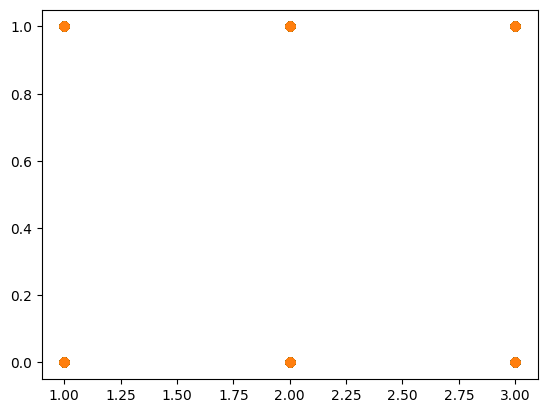

In [20]:
plt.scatter(X_test['cholesterol'],y_test)
plt.scatter(X_test['cholesterol'],y_predict)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))

Accuracy: 0.7350949989080585

Confusion Matrix:
 [[5438 1452]
 [2187 4660]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6890
           1       0.76      0.68      0.72      6847

    accuracy                           0.74     13737
   macro avg       0.74      0.73      0.73     13737
weighted avg       0.74      0.74      0.73     13737



In [23]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

#diffrence between train and test accuracy
diff_acc = train_acc - test_acc
print("Difference between Training and Testing Accuracy:", diff_acc)

Training Accuracy: 0.7525343525343525
Testing Accuracy: 0.7350949989080585
Difference between Training and Testing Accuracy: 0.017439353626294007


In [24]:
#hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)


c:\Users\ESHA DUBAL\OneDrive\Desktop\cardio_project\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [25]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.7333515333515334


In [26]:
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Tuned Accuracy: 0.735313387202446
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6890
           1       0.76      0.68      0.72      6847

    accuracy                           0.74     13737
   macro avg       0.74      0.74      0.73     13737
weighted avg       0.74      0.74      0.73     13737



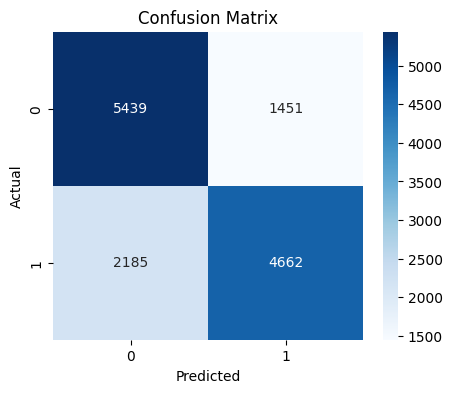

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

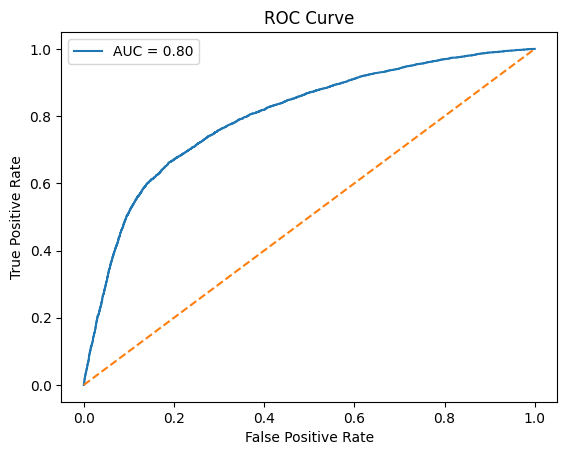

In [28]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [29]:
import pickle

In [30]:
with open("../models/rf_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)


In [31]:
with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(sclr, f)


In [32]:
feature_columns = X1.columns.tolist()
with open("../models/feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)


In [33]:
feature_columns

['height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'age_years',
 'gender_Female',
 'gender_Male']

In [ ]:


mappings = {
    "cholesterol": {
        "normal": 1,
        "above_normal": 2,
        "well_above": 3
    },
    "gluc": {
        "normal": 1,
        "above_normal": 2,
        "well_above": 3
    },
    "smoke": {
        "no": 0,
        "yes": 1
    },
    "alco": {
        "no": 0,
        "yes": 1
    },
    "active": {
        "no": 0,
        "yes": 1
    },
    "gender": {
        "Male": {"gender_Male": 1, "gender_Female": 0},
        "Female": {"gender_Male": 0, "gender_Female": 1}
    }
}

with open("../models/mappings.pkl", "wb") as f:
    pickle.dump(mappings, f)
    


In [35]:
import os
os.listdir("../models")


['feature_columns.pkl', 'mappings.pkl', 'rf_model.pkl', 'scaler.pkl']

In [4]:
import pickle


In [5]:
#load model
with open("../models/rf_model.pkl", "rb") as f:
    model = pickle.load(f)

In [18]:
y_pred = model.predict(X_test)

# For AUC-ROC (probabilities)
y_proba = model.predict_proba(X_test)[:, 1]


In [19]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
print(f"AUC-ROC: {auc:.2f}")


Accuracy: 73.53%
Precision: 76.26%
Recall: 68.09%
F1-Score: 71.94%
AUC-ROC: 0.80
